# Chapter: Support Vector Machines & Kernel Methods


# Topic: c

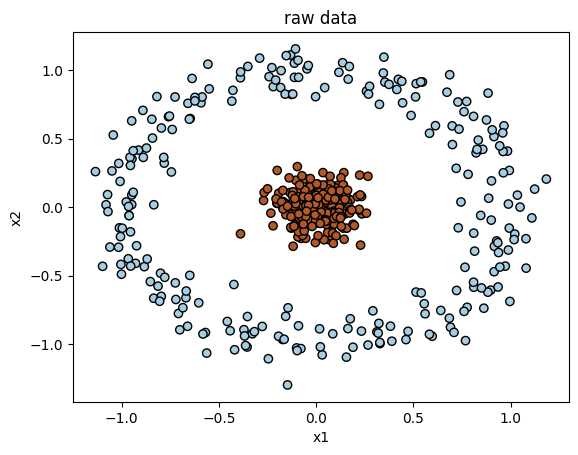

In [16]:
# generate data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(500, factor=.08, noise=.1, random_state=1)
# note that y = 0,1 here and need not be +-1; SVM does internal transformation accordingly

# plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [17]:
# find optimal hyperparameter via GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(SVC(), param_grid, cv=5).fit(X, y) # no scaling required as input variables are already scaled


print('Optimal hyperparameter:', gs.best_params_)

Optimal hyperparameter: {'C': 0.1, 'gamma': 1}


Accuracy: 1.00


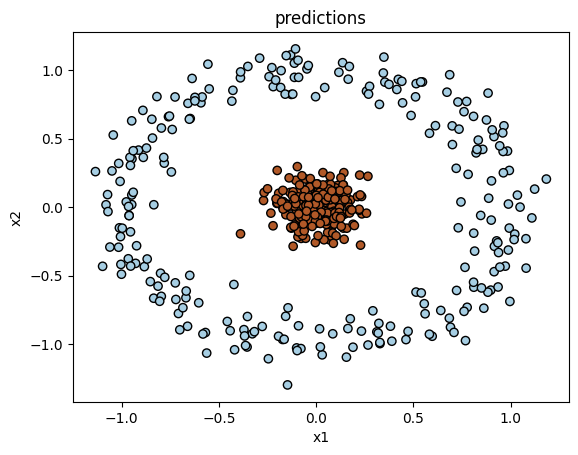

In [18]:
# plot model predictions
from sklearn.metrics import accuracy_score
y_predicted = gs.predict(X)

acc = accuracy_score(y, y_predicted)
print(f"Accuracy: {acc:.2f}")

# plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('predictions')
plt.show()

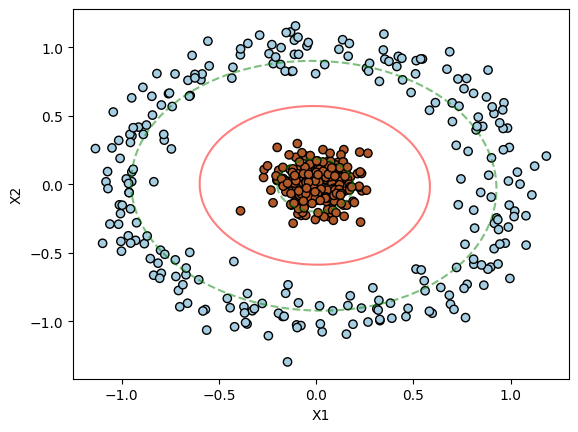

In [19]:
# plot SVM boundaries
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('X1'), plt.ylabel('X2')

# get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
import numpy as np
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = gs.decision_function(xy).reshape(XX.shape)

# plot decision boundary and supporting planes
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors=['green', 'red', 'green'])
plt.show()

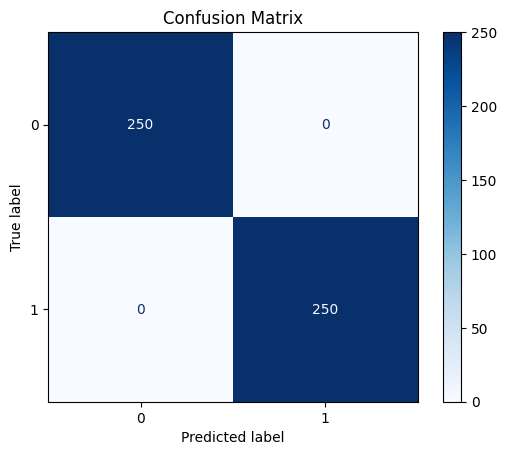

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


cm = confusion_matrix(y, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

